In [17]:
import pickle
import statistics
import matplotlib.pyplot as plt
from datetime import datetime
from copy import deepcopy
import numpy as np

In [ ]:
# Load data
with open("../results/20240901T174800_plain.pkl", "rb") as f:
    openMP_1 = pickle.load(f)

with open("../results/20240901T184619_openMP6.pkl", "rb") as f:
    openMP_6 = pickle.load(f)

with open("../results/20240901T175902_openMP.pkl", "rb") as f:
    openMP_12 = pickle.load(f)

In [ ]:
# Function to process data
def preprocess_data(data):
    res = {}
    for k, v in data.items():
        model = "_".join(k.split("_")[7:])
        nx = k.split("_")[1][2:]
        ny = k.split("_")[2][2:]
        nz = k.split("_")[3][2:]
        num_iter = k.split("_")[5][4:]
        precision = k.split("_")[6][1:]

        model_dict = res.setdefault(model, {})
        precision_dict = model_dict.setdefault(precision, {})
        precision_dict.setdefault((nx, ny, nz, num_iter), []).append(v)
    return res


# Functions for run statistics
def get_mean(data):
    res = deepcopy(data)
    for k, v in data.items():
        for x, y in v.items():
            for i, j in y.items():
                res[k][x][i] = statistics.mean(j)
    return res


def get_std(data):
    res = deepcopy(data)
    for k, v in data.items():
        for x, y in v.items():
            for i, j in y.items():
                res[k][x][i] = statistics.std(j)
    return res

In [52]:
# Function to create plots
def plotter(data, title="", keys_to_plot=[], save_plot=True):
    fig, ax = plt.subplots()
    num_iter = []
    for k, v in data.items():
        for i, j in v.items():
            label = f"{k}_{i}"
            for _, _, _, n in j.keys():
                num_iter.append(n)
            if label in keys_to_plot:
                plt.plot(j.values(), label=label[:-3].title().replace("_", " "))

    # Show Legend
    plt.legend()

    # Add Title
    plt.title(title)

    # Set x Tick Lables (+ rotation)
    split_ticks = [str(k).replace("(", "").split(",")[:-1] for k in j.keys()]
    nxnynz=[[nx.replace("'", ""), ny.replace("'", ""), nz.replace("'", "")] for nx, ny, nz in split_ticks]
    nxnynz_string=[f"nx: {nxnynz[i][0]}, ny: {nxnynz[i][1]}, nz: {nxnynz[i][2]}" for i in range(len(nxnynz))]
    ax.set_xticklabels([0]+ nxnynz_string)
    plt.xticks(rotation=45, ha="right")

    # Activate grid
    plt.grid()

    # Name Axis
    plt.xlabel(f"Size of Input (num_iter: {num_iter[0]})")
    plt.ylabel("Runtime [s]")

    # Save figure
    if save_plot:
        plt.savefig(
            f"../plots/{datetime.now().strftime('%Y%m%dT%H%M%S')}-{title.replace('_', title).lower()}.pdf",
            bbox_inches="tight",
        )


In [53]:
# Process data
cpu_1 = preprocess_data(openMP_1)
cpu_6 = preprocess_data(openMP_6)
cpu_12 = preprocess_data(openMP_12)

['nx: 16, ny:  16, nz:  64', 'nx: 32, ny:  32, nz:  64', 'nx: 48, ny:  48, nz:  64', 'nx: 64, ny:  64, nz:  64', 'nx: 80, ny:  80, nz:  64', 'nx: 96, ny:  96, nz:  64', 'nx: 112, ny:  112, nz:  64', 'nx: 128, ny:  128, nz:  64']


/tmp/ipykernel_19150/3403689443.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ nxnynz_string)


['nx: 16, ny:  16, nz:  64', 'nx: 32, ny:  32, nz:  64', 'nx: 48, ny:  48, nz:  64', 'nx: 64, ny:  64, nz:  64', 'nx: 80, ny:  80, nz:  64', 'nx: 96, ny:  96, nz:  64', 'nx: 112, ny:  112, nz:  64', 'nx: 128, ny:  128, nz:  64']


/tmp/ipykernel_19150/3403689443.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ nxnynz_string)


['nx: 16, ny:  16, nz:  64', 'nx: 32, ny:  32, nz:  64', 'nx: 48, ny:  48, nz:  64', 'nx: 64, ny:  64, nz:  64', 'nx: 80, ny:  80, nz:  64', 'nx: 96, ny:  96, nz:  64', 'nx: 112, ny:  112, nz:  64', 'nx: 128, ny:  128, nz:  64']


/tmp/ipykernel_19150/3403689443.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ nxnynz_string)


['nx: 16, ny:  16, nz:  64', 'nx: 32, ny:  32, nz:  64', 'nx: 48, ny:  48, nz:  64', 'nx: 64, ny:  64, nz:  64', 'nx: 80, ny:  80, nz:  64', 'nx: 96, ny:  96, nz:  64', 'nx: 112, ny:  112, nz:  64', 'nx: 128, ny:  128, nz:  64']


/tmp/ipykernel_19150/3403689443.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ nxnynz_string)


['nx: 16, ny:  16, nz:  64', 'nx: 32, ny:  32, nz:  64', 'nx: 48, ny:  48, nz:  64', 'nx: 64, ny:  64, nz:  64', 'nx: 80, ny:  80, nz:  64', 'nx: 96, ny:  96, nz:  64', 'nx: 112, ny:  112, nz:  64', 'nx: 128, ny:  128, nz:  64']


/tmp/ipykernel_19150/3403689443.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ nxnynz_string)


['nx: 16, ny:  16, nz:  64', 'nx: 32, ny:  32, nz:  64', 'nx: 48, ny:  48, nz:  64', 'nx: 64, ny:  64, nz:  64', 'nx: 80, ny:  80, nz:  64', 'nx: 96, ny:  96, nz:  64', 'nx: 112, ny:  112, nz:  64', 'nx: 128, ny:  128, nz:  64']


/tmp/ipykernel_19150/3403689443.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ nxnynz_string)


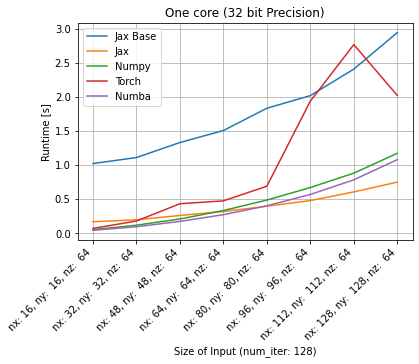

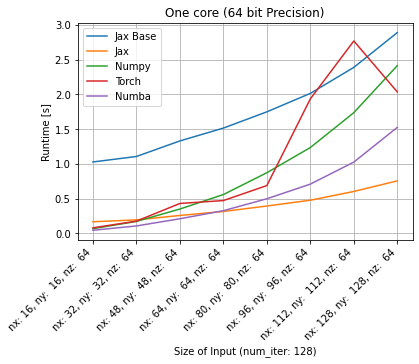

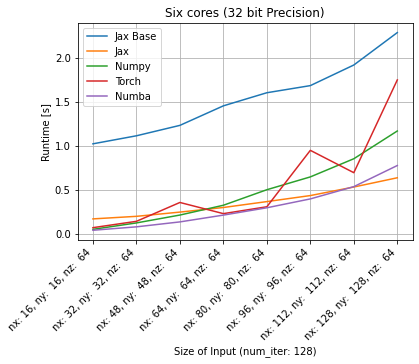

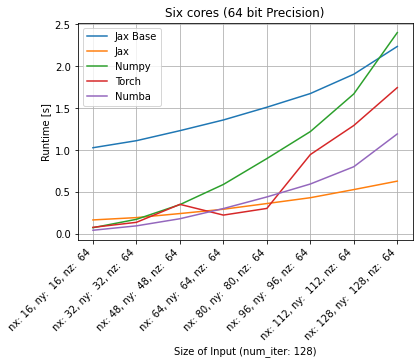

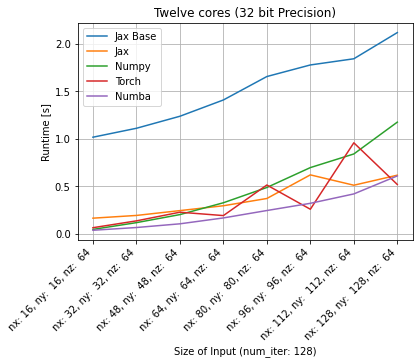

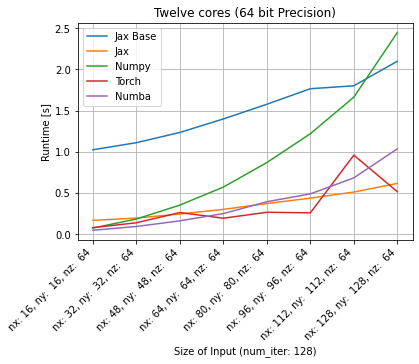

In [54]:
plotter(
    get_mean(cpu_1),
    title="One core (32 bit Precision)",
    keys_to_plot=["jax_base_32", "jax_32", "numpy_32", "torch_32", "numba_32"],
)
plotter(
    get_mean(cpu_1),
    title="One core (64 bit Precision)",
    keys_to_plot=["jax_base_64", "jax_64", "numpy_64", "torch_64", "numba_64"],
)
plotter(
    get_mean(cpu_6),
    title="Six cores (32 bit Precision)",
    keys_to_plot=["jax_base_32", "jax_32", "numpy_32", "torch_32", "numba_32"],
)
plotter(
    get_mean(cpu_6),
    title="Six cores (64 bit Precision)",
    keys_to_plot=["jax_base_64", "jax_64", "numpy_64", "torch_64", "numba_64"],
)
plotter(
    get_mean(cpu_12),
    title="Twelve cores (32 bit Precision)",
    keys_to_plot=["jax_base_32", "jax_32", "numpy_32", "torch_32", "numba_32"],
)
plotter(
    get_mean(cpu_12),
    title="Twelve cores (64 bit Precision)",
    keys_to_plot=["jax_base_64", "jax_64", "numpy_64", "torch_64", "numba_64"],
)

In [55]:
res = (
    {"1_" + str(key): val for key, val in cpu_1.items()}
    | {"6_" + str(key): val for key, val in cpu_6.items()}
    | {"12_" + str(key): val for key, val in cpu_12.items()}
)

['nx: 16, ny:  16, nz:  64', 'nx: 32, ny:  32, nz:  64', 'nx: 48, ny:  48, nz:  64', 'nx: 64, ny:  64, nz:  64', 'nx: 80, ny:  80, nz:  64', 'nx: 96, ny:  96, nz:  64', 'nx: 112, ny:  112, nz:  64', 'nx: 128, ny:  128, nz:  64']


/tmp/ipykernel_19150/3403689443.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ nxnynz_string)


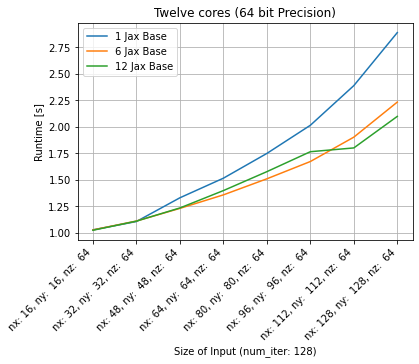

In [56]:
plotter(
    get_mean(res),
    title="Twelve cores (64 bit Precision)",
    keys_to_plot=["1_jax_base_64", "6_jax_base_64", "12_jax_base_64"],
    save_plot=False,
)